In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rc('font',family='Times New Roman')

In [3]:
s = np.array([1e-05,2e-05,3e-05, 4e-05,5e-05, 6e-05, 7e-05,8e-05]) #5
len=s.size
print('CVODE   ST_cv   DNN   ST_dnn')
heat_release_per_volume=966196.5
ffa=1.6e-05

ST_dnn=np.zeros(len)
ST_cv=np.zeros(len)
for i in range(0,len):
    t=s[i]

    Qdotfile = open('../dnn_data/%s/Qdot'%t)
    Qdot_data = np.loadtxt(Qdotfile,skiprows=22,max_rows=440000) 
    Qdot = Qdot_data[0:-1]
    dVfile = open('./V-env') 
    dV_data = np.loadtxt(dVfile,skiprows=22,max_rows=440000) 
    dV = dV_data[0:-1]

    QdotCfile = open('../cv_data/%s/Qdot'%t)
    QdotC_data = np.loadtxt(QdotCfile,skiprows=22,max_rows=440000) 
    QdotC = QdotC_data[0:-1]

    total_heat_release = np.sum(dV[:] * Qdot[:]) 
    total_heat_releaseC = np.sum(dV[:] * QdotC[:]) 
    dnn='{:.2f}'.format(total_heat_release)
    cvode='{:.2f}'.format(total_heat_releaseC)
    
    ST_dnn[i]=(total_heat_release/ffa)/heat_release_per_volume
    ST_cv[i]=(total_heat_releaseC/ffa)/heat_release_per_volume
    print('%s   %s   %s   %s'%(cvode,'{:.2f}'.format(ST_cv[i]),dnn,'{:.2f}'.format(ST_dnn[i])))
    


CVODE   ST_cv   DNN   ST_dnn
17.94   1.16   20.63   1.33
22.96   1.49   22.01   1.42
27.32   1.77   25.86   1.67
32.47   2.10   31.45   2.03
39.40   2.55   39.51   2.56
48.62   3.15   50.59   3.27
59.50   3.85   63.58   4.11
71.20   4.61   77.39   5.01


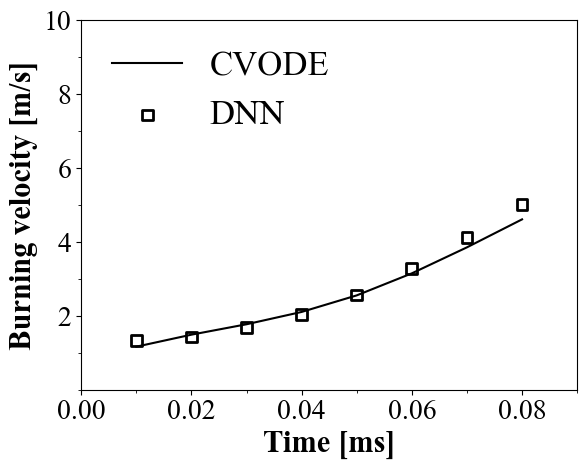

In [4]:
plt.xlim(0,0.09)
plt.ylim(0,)
plt.rcParams['xtick.direction'] = 'in'#将x轴的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度线方向设置向内
plt.rc('font',family='Times New Roman')  #指定全局字体
plt.plot(s*1000,ST_cv,label='CVODE',color='black')
plt.scatter(s*1000,ST_dnn,s=60, marker='s',label='DNN',edgecolors='black',c='none',linewidths=2)

plt.xticks((np.arange(0,5))*0.02,fontsize=20)
plt.yticks((np.arange(1,6))*2,fontsize=20)
plt.minorticks_on()  #minor

plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.xlabel('Time [ms]',fontsize=22,fontweight='bold')  #加粗
plt.ylabel('Burning velocity [m/s]',fontsize=22,fontweight='bold')
plt.rcParams.update({'font.size': 25})
plt.legend(frameon=False, loc=2)